In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Data Pre-processing

In [2]:
data_train = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
data_test = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

In [3]:
data_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
print("Size: " + str(data_train.size))
print("Shape: " + str(data_train.shape))
print("-----------------------")
print(data_train.value_counts('attack_cat'))
print("-----------------------")
print(data_train.value_counts('label'))

Size: 7890345
Shape: (175341, 45)
-----------------------
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64
-----------------------
label
1    119341
0     56000
Name: count, dtype: int64


In [6]:
# Handle missing value and duplicate if any
data_train.dropna(inplace=True)
data_train.drop_duplicates(inplace=True)

data_test.dropna(inplace=True)
data_test.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Label Distribution')

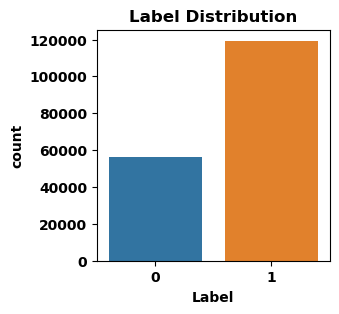

In [7]:
#Attack and Normal distribution
plt.figure(figsize=(3, 3))
sns.countplot(data=data_train, x="label")
plt.xlabel("Label")
plt.title("Label Distribution")

Text(0.5, 1.0, 'Attack Category Distribution')

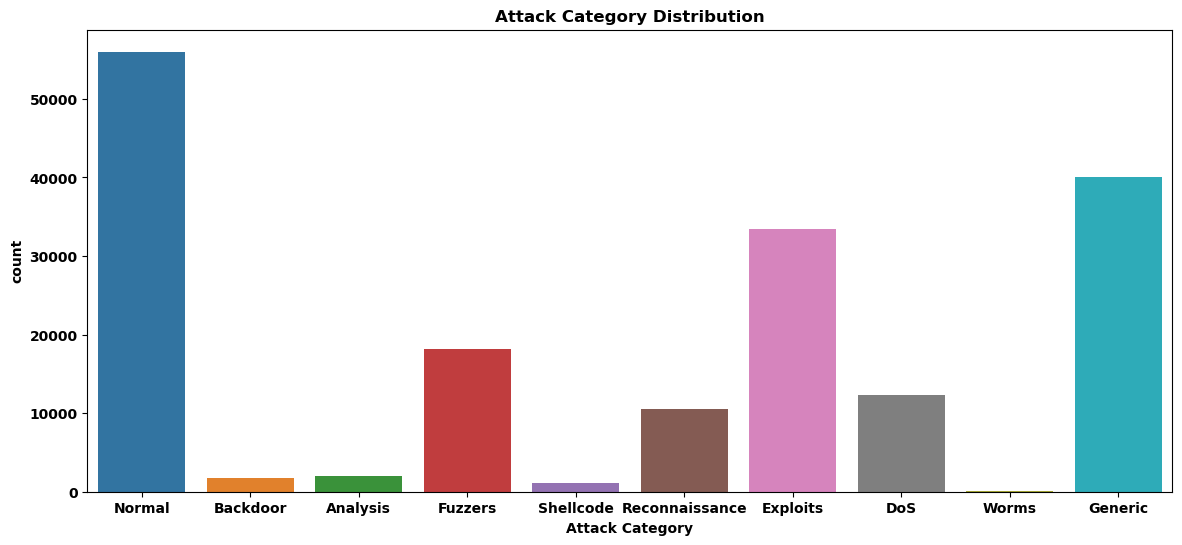

In [8]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

In [9]:
#All_feature
all_feature = data_train.columns
all_feature

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [10]:
#Split Attack and Normal from dataframe
data_train_attack = data_train[data_train['label'] == 1]
data_test_attack = data_test[data_test['label'] == 1]

#Optional
#data_train_normal = data_train[data_train['label'] == 0]
#data_test_normal = data_test[data_test['label'] == 0]

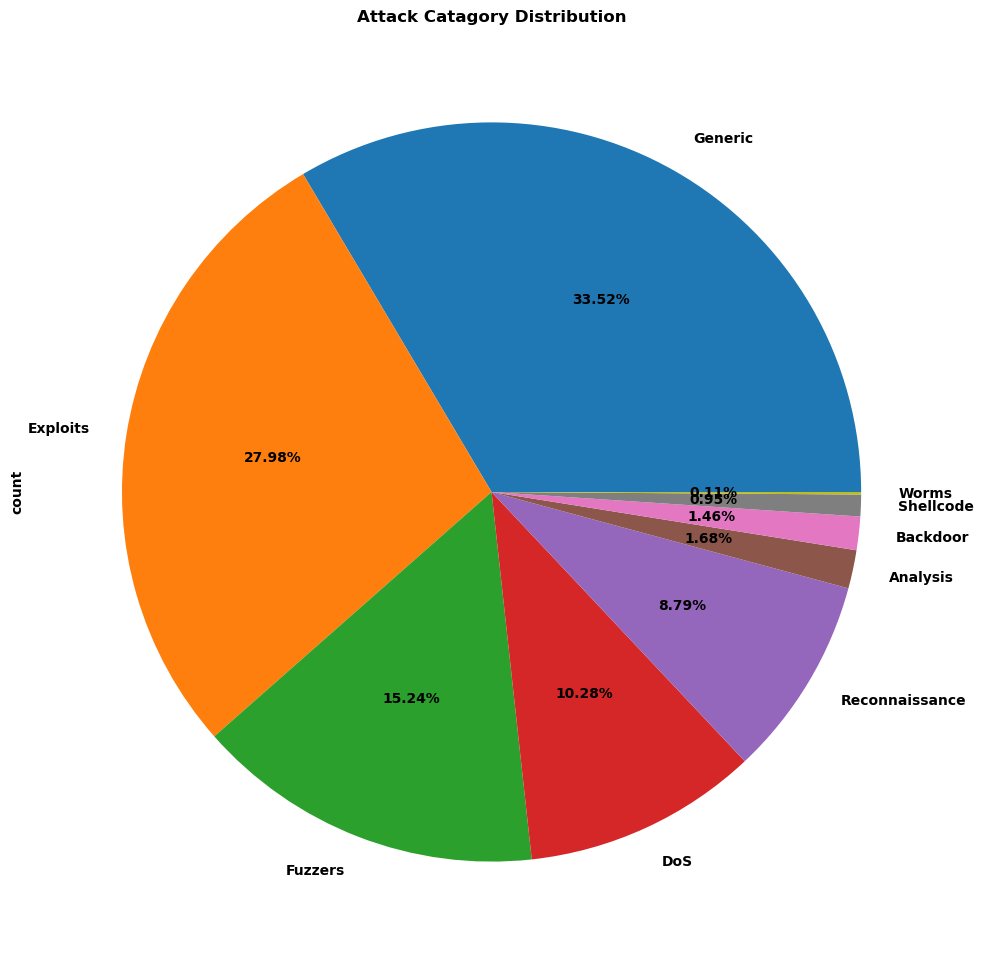

In [11]:
#Attack Category Distribution
plt.figure(figsize=(12, 12))
data_train_attack['attack_cat'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Attack Catagory Distribution")
plt.show()

Text(0.5, 1.0, 'Attack Category Distribution')

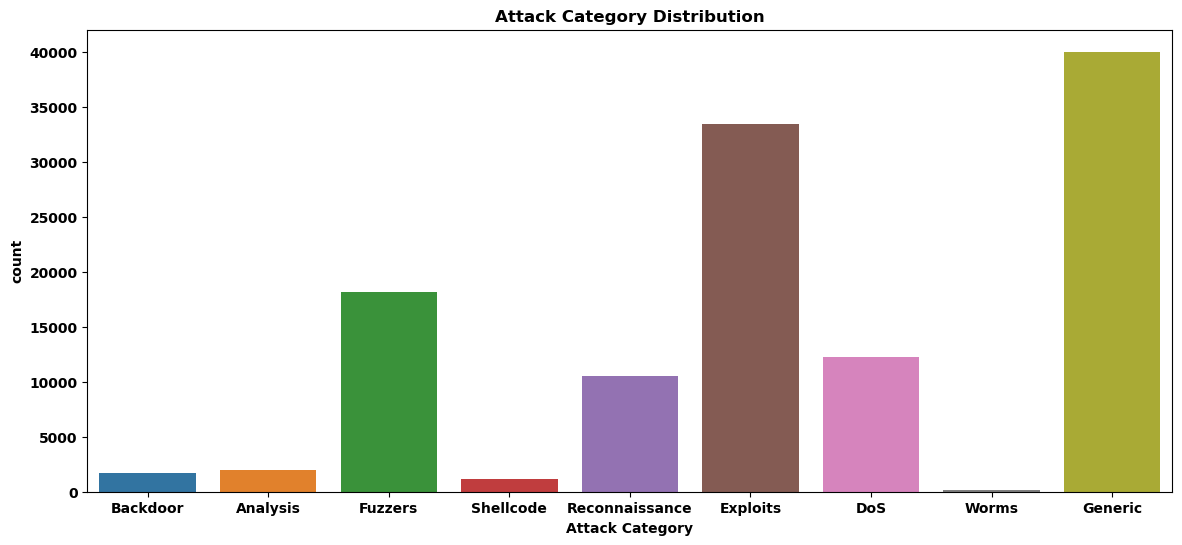

In [12]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

## Encode Train Data

In [13]:
#Encode attack_cat
le = LabelEncoder()
data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])

#Encode state
data_train_attack['state'] = le.fit_transform(data_train_attack['state'])

#Encode service
data_train_attack['service'] = le.fit_transform(data_train_attack['service'])

#Encode proto
data_train_attack['proto'] = le.fit_transform(data_train_attack['proto'])

data_train_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_3500\2731351650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3500\2731351650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['state'] = le.fit_transform(data_train_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3500\2731351650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

## Encode Test Data

In [14]:
#Encode attack_cat
data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])

#Encode state
data_test_attack['state'] = le.fit_transform(data_test_attack['state'])

#Encode service
data_test_attack['service'] = le.fit_transform(data_test_attack['service'])

#Encode proto
data_test_attack['proto'] = le.fit_transform(data_test_attack['proto'])

data_test_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_3500\230897011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3500\230897011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['state'] = le.fit_transform(data_test_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3500\230897011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

Text(0.5, 1.0, 'Attack Category Distribution')

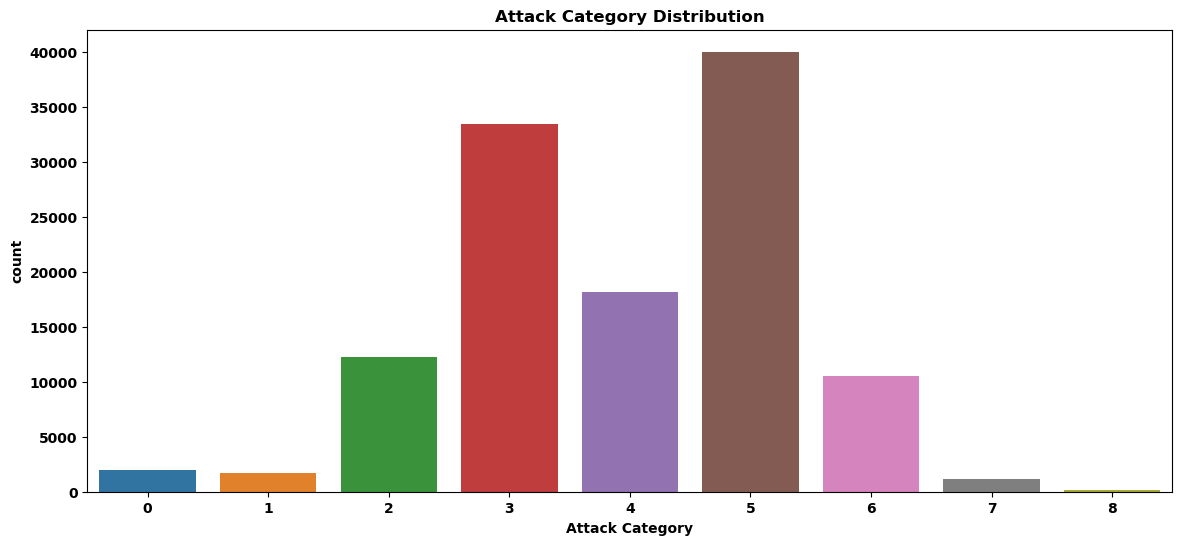

In [15]:
#After Attack Category Encoding
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

## Feature Selection

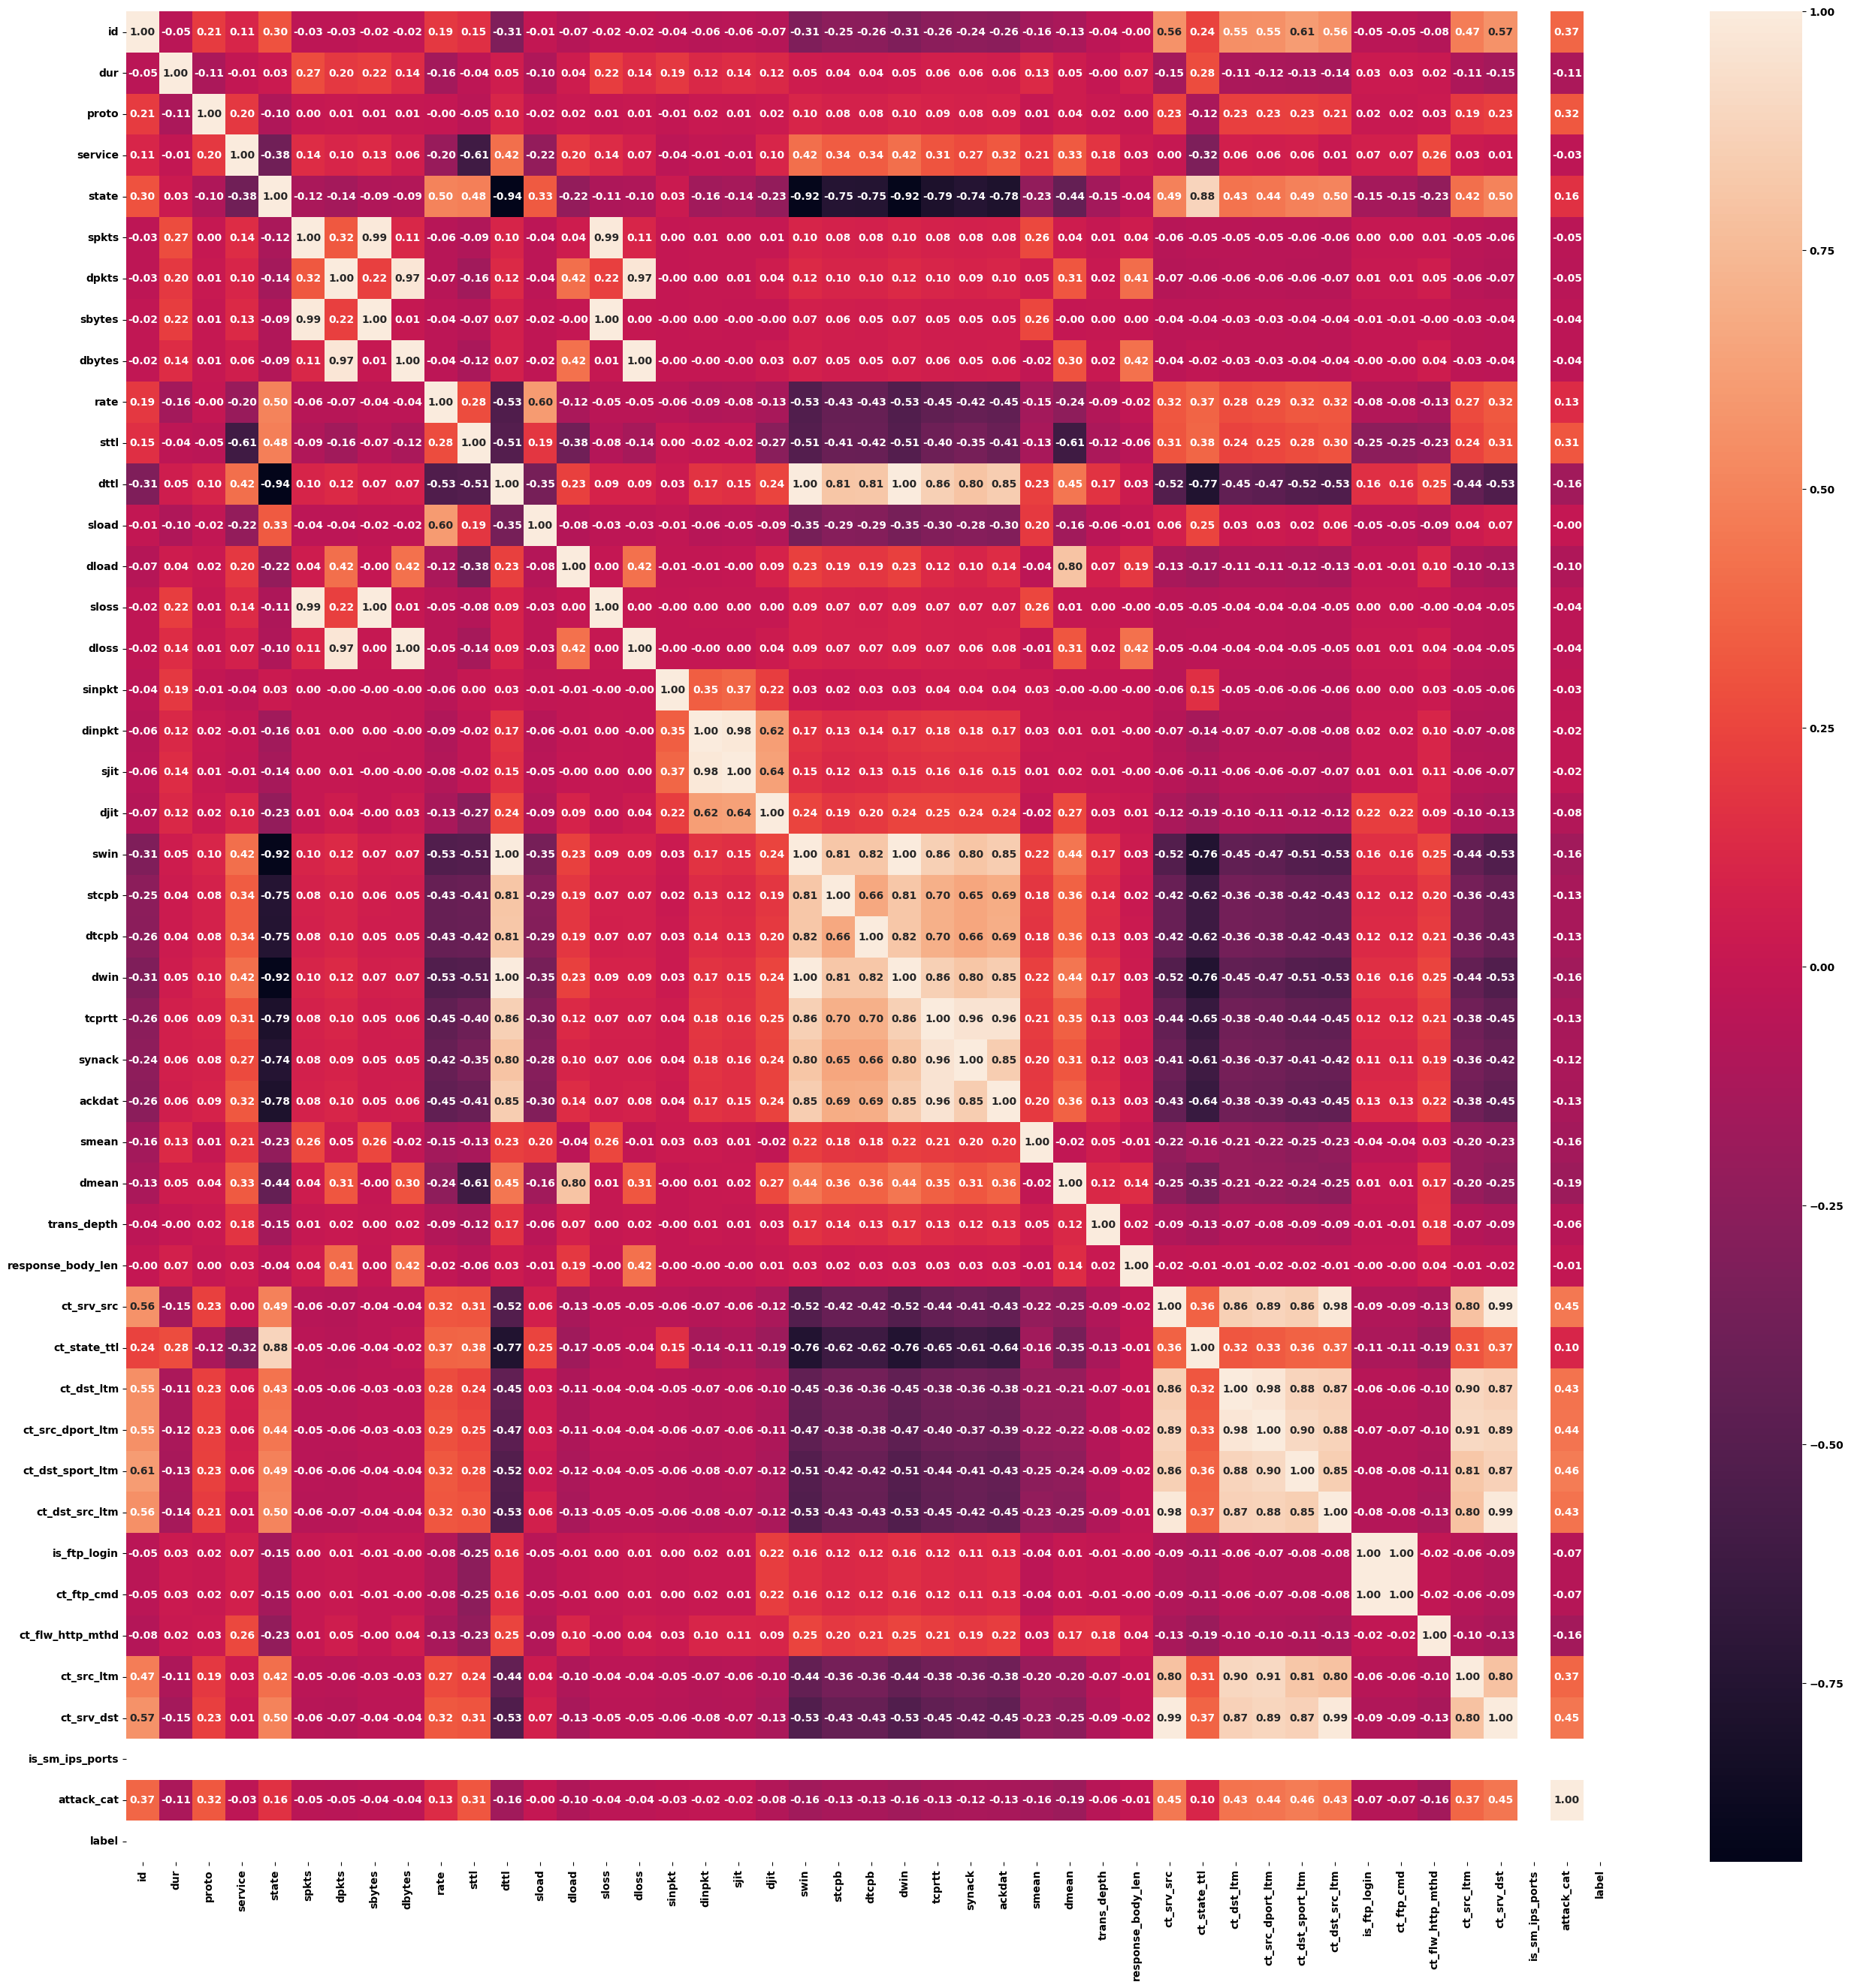

In [16]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(data_train_attack.corr(), annot=True, fmt=".2f")
plt.show()

In [17]:
#Feature Selection
feature = data_train_attack.drop(['id', 'dinpkt', 'ct_ftp_cmd', 'is_sm_ips_ports', 'label'], axis=1)
feature.dtypes

dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm

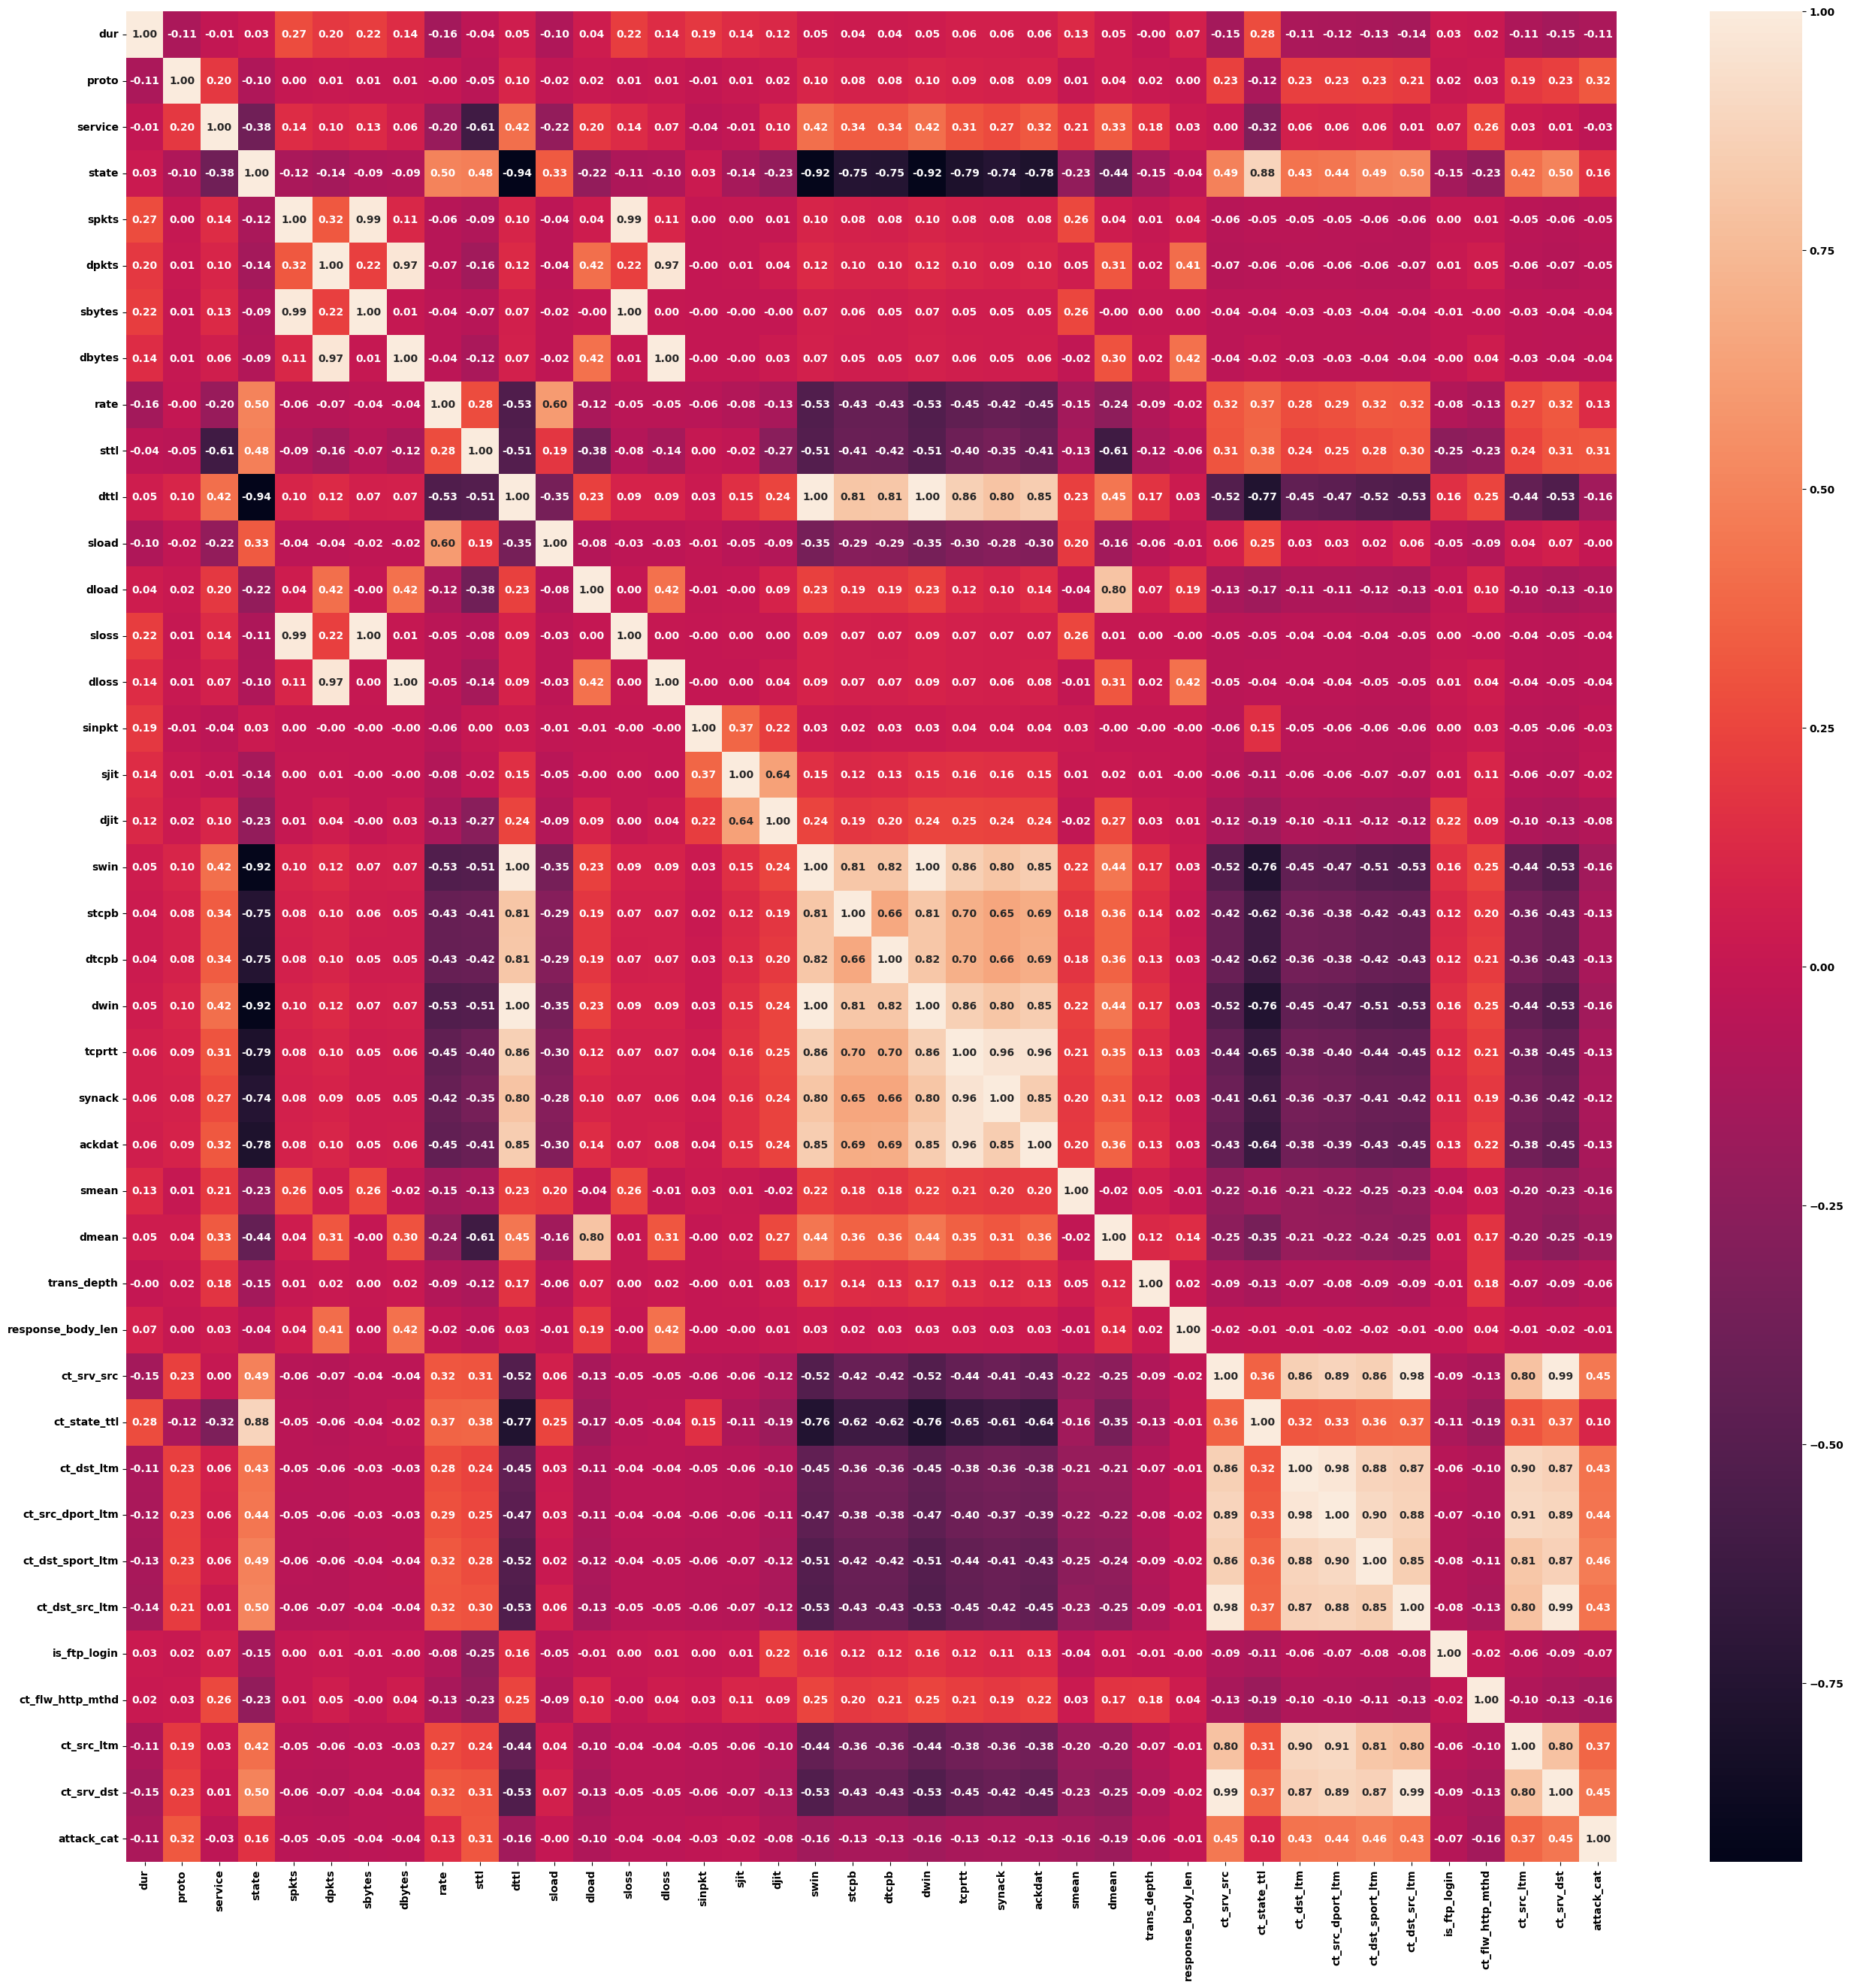

In [18]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(feature.corr(), annot=True, fmt=".2f")
plt.show()

# Balancing Data

In [19]:
#Splitting the dataset into dependent and independent feature
X_train = feature.drop(columns=['attack_cat'])
y_train = feature["attack_cat"]

X_test = data_test_attack.drop(columns=['attack_cat', 'id', 'dinpkt', 'ct_ftp_cmd', 'is_sm_ips_ports', 'label'])
y_test = data_test_attack["attack_cat"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((119341, 39), (119341,), (45332, 39), (45332,))

## SMOTE

In [20]:
smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

X_smote.shape, y_smote.shape

((360000, 39), (360000,))

<Axes: xlabel='attack_cat', ylabel='count'>

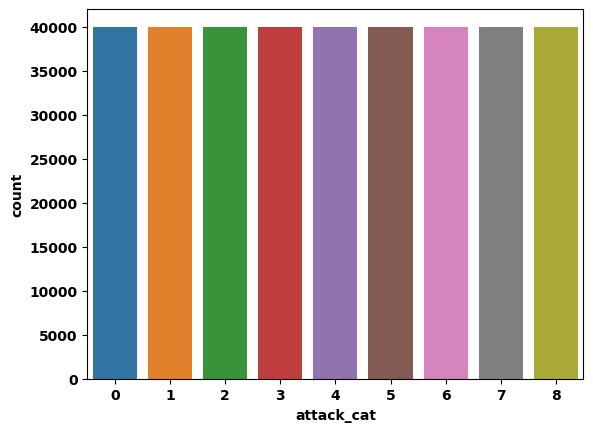

In [21]:
#Create new dataframe from X_smote and y_smote to count every attack
data_smote = pd.concat([X_smote, y_smote], axis=1)

sns.countplot(data=data_smote, x="attack_cat")

In [22]:
#data_stl.drop_duplicates(inplace=True)
print(data_smote.value_counts('attack_cat'))
print("--------------------")
print("Shape: " + str(data_smote.shape))
print("--------------------")
print("Duplicates: " + str(data_smote.duplicated().sum()))

attack_cat
0    40000
1    40000
2    40000
3    40000
4    40000
5    40000
6    40000
7    40000
8    40000
Name: count, dtype: int64
--------------------
Shape: (360000, 40)
--------------------
Duplicates: 147136


# Model Evaluation

In [23]:
#Holder to store model performance
from sklearn import metrics
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 5))
    f1_score.append(round(b, 5))
    recall.append(round(c, 5))
    precision.append(round(d, 5))

In [24]:
#function to computing performance and computing performance using classification report, then stroing the results
def model_report(modelName, y_train, y_test, p_train, p_test):
    print("Model:{}\n".format(modelName))

    #computing accuracy score
    acc_train = metrics.accuracy_score(y_train, p_train)
    acc_test = metrics.accuracy_score(y_test, p_test)
    print("Accuracy on training Data: {:.5f}".format(acc_train))
    print("Accuracy on test Data: {:.5f}\n".format(acc_test))

    #computing f1 score
    f1_score_train = metrics.f1_score(y_train, p_train, average='macro')
    f1_score_test = metrics.f1_score(y_test, p_test, average='macro')
    print("F1 score on training Data: {:.5f}".format(f1_score_train))
    print("F1 score on test Data: {:.5f}\n".format(f1_score_test))

    #computing recall score
    recall_score_train = metrics.recall_score(y_train, p_train, average='macro')
    recall_score_test = metrics.recall_score(y_test, p_test, average='macro')
    print("Recall score on training Data: {:.5f}".format(recall_score_train))
    print("Recall score on test Data: {:.5f}\n".format(recall_score_test))

    #computing precision score
    precision_score_train = metrics.precision_score(y_train, p_train, average='macro')
    precision_score_test = metrics.precision_score(y_test, p_test, average='macro')
    print("Precision on training Data: {:.5f}".format(precision_score_train))
    print("Precision on test Data: {:.5f}\n".format(precision_score_test))

    #computing classification report of model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))

    #storing results
    storeResults(modelName, acc_test, f1_score_test, recall_score_test, precision_score_test)

## Training, Testing, Evaluation

### Decision Tree

In [25]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

#instantiate the model
destree = DecisionTreeClassifier(max_depth=14)

#fit the model
destree.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=14)

In [26]:
#predicting
p_train_destree = destree.predict(X_smote)
p_test_destree = destree.predict(X_test)

In [27]:
#call report function
model_report(str(destree), y_smote, y_test, p_train_destree, p_test_destree)

Model:DecisionTreeClassifier(max_depth=14)

Accuracy on training Data: 0.74751
Accuracy on test Data: 0.73877

F1 score on training Data: 0.75579
F1 score on test Data: 0.47053

Recall score on training Data: 0.74751
Recall score on test Data: 0.59681

Precision on training Data: 0.78324
Precision on test Data: 0.47262

Classification Report
              precision    recall  f1-score   support

           0       0.04      0.07      0.05       677
           1       0.04      0.31      0.08       583
           2       0.32      0.28      0.30      4089
           3       0.83      0.59      0.69     11132
           4       0.80      0.67      0.73      6062
           5       1.00      0.97      0.98     18871
           6       0.89      0.81      0.85      3496
           7       0.24      0.90      0.37       378
           8       0.11      0.77      0.19        44

    accuracy                           0.74     45332
   macro avg       0.47      0.60      0.47     45332
weight

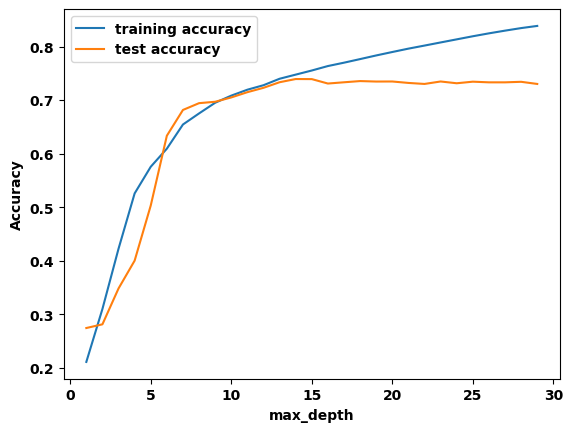

In [28]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try max_depth from 1 to 30
depth = range(1, 30)
for n in depth:
    destree_test = DecisionTreeClassifier(max_depth=n)

    destree_test.fit(X_smote, y_smote)
    #record training set accuracy
    training_accuracy.append(destree_test.score(X_smote, y_smote))
    #recor generalization accuracy
    test_accuracy.append(destree_test.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Random Forest

In [29]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
ranfor = RandomForestClassifier(n_estimators=18)

#fit the model
ranfor.fit(X_smote, y_smote)

RandomForestClassifier(n_estimators=18)

In [30]:
#predicting
p_train_ranfor = ranfor.predict(X_smote)
p_test_ranfor = ranfor.predict(X_test)

In [31]:
#call report function
model_report(str(ranfor), y_smote, y_test, p_train_ranfor, p_test_ranfor)

Model:RandomForestClassifier(n_estimators=18)

Accuracy on training Data: 0.85533
Accuracy on test Data: 0.74239

F1 score on training Data: 0.85931
F1 score on test Data: 0.50785

Recall score on training Data: 0.85533
Recall score on test Data: 0.59459

Precision on training Data: 0.87495
Precision on test Data: 0.51631

Classification Report
              precision    recall  f1-score   support

           0       0.09      0.29      0.13       677
           1       0.04      0.32      0.07       583
           2       0.44      0.17      0.24      4089
           3       0.81      0.63      0.71     11132
           4       0.77      0.69      0.73      6062
           5       1.00      0.97      0.98     18871
           6       0.87      0.81      0.84      3496
           7       0.26      0.84      0.40       378
           8       0.37      0.64      0.47        44

    accuracy                           0.74     45332
   macro avg       0.52      0.59      0.51     45332
wei

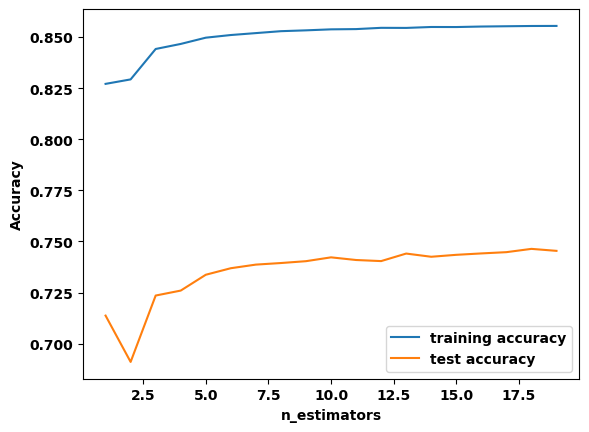

In [32]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try n_estimators from 1 to 20
n_est = range(1, 20)
for n in n_est:
    ranfor_test = RandomForestClassifier(n_estimators=n)

    ranfor_test.fit(X_smote, y_smote)
    #record training set accuracy
    training_accuracy.append(ranfor_test.score(X_smote, y_smote))
    #recor generalization accuracy
    test_accuracy.append(ranfor_test.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(n_est, training_accuracy, label="training accuracy")
plt.plot(n_est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

### Gradient Boosting

In [33]:
#import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

#instantiate the model
gbc = GradientBoostingClassifier()

#fit the model
gbc.fit(X_smote, y_smote)

GradientBoostingClassifier()

In [34]:
#predicting
p_train_gbc = gbc.predict(X_smote)
p_test_gbc = gbc.predict(X_test)

In [35]:
#call report function
model_report(str(gbc), y_smote, y_test, p_train_gbc, p_test_gbc)

Model:GradientBoostingClassifier()

Accuracy on training Data: 0.72715
Accuracy on test Data: 0.74793

F1 score on training Data: 0.73189
F1 score on test Data: 0.47007

Recall score on training Data: 0.72715
Recall score on test Data: 0.60845

Precision on training Data: 0.75881
Precision on test Data: 0.47221

Classification Report
              precision    recall  f1-score   support

           0       0.03      0.09      0.05       677
           1       0.07      0.09      0.07       583
           2       0.34      0.53      0.41      4089
           3       0.84      0.56      0.67     11132
           4       0.86      0.65      0.74      6062
           5       0.95      0.96      0.96     18871
           6       0.87      0.83      0.85      3496
           7       0.22      0.93      0.35       378
           8       0.06      0.84      0.12        44

    accuracy                           0.75     45332
   macro avg       0.47      0.61      0.47     45332
weighted avg  

### XGBoost

In [36]:
#import xgboost classifier
from xgboost import XGBClassifier

#instantiate the model
xgb = XGBClassifier()

#fit the model
xgb.fit(X_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
#predicting
p_train_xgb = xgb.predict(X_smote)
p_test_xgb = xgb.predict(X_test)

In [38]:
#call report function
model_report(str(xgb), y_smote, y_test, p_train_xgb, p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy on training Data: 0.78082
Accuracy on test Data: 0.76370

F1 score on training Data: 0.78739
F1 score on test Data: 0.50366

Recall score on training Data: 0.78082
Recall score on test Data: 0.59594

Precision on trai

# Result

## Comparison of Models

In [39]:
#creating dataframe
result = pd.DataFrame({'ML Model' : ML_Model,
                       'Accuracy' : accuracy,
                       'F1 Score' : f1_score,
                       'Recall' : recall,
                       'Precision' : precision
                       })
result

,ML Model,Accuracy,F1 Score,Recall,Precision
0,DecisionTreeClassifier(max_depth=14),0.73877,0.47053,0.59681,0.47262
1,RandomForestClassifier(n_estimators=18),0.74239,0.50785,0.59459,0.51631
2,GradientBoostingClassifier(),0.74793,0.47007,0.60845,0.47221
3,"XGBClassifier(base_score=None, booster=None, c...",0.76370,0.50366,0.59594,0.50913


In [40]:
#Sorting the dataframe on accuracy
sorted_result = result.sort_values(by=['Recall'], ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,F1 Score,Recall,Precision
0,GradientBoostingClassifier(),0.74793,0.47007,0.60845,0.47221
1,DecisionTreeClassifier(max_depth=14),0.73877,0.47053,0.59681,0.47262
2,"XGBClassifier(base_score=None, booster=None, c...",0.76370,0.50366,0.59594,0.50913
3,RandomForestClassifier(n_estimators=18),0.74239,0.50785,0.59459,0.51631


## Save to csv file

In [41]:
#save result to csv file
sorted_result.to_csv('encode_smote_unswnb15_result.csv')

## Confusion Matrix

In [42]:
# function to calculate recall from confusion matrix
def calculate_recall(confusion_matrix):
    num_class = len(confusion_matrix)
    recalls = []

    for i in range(num_class):
        true_positive = confusion_matrix[i][i]
        false_negative = sum(confusion_matrix[i]) - true_positive

        recall = true_positive / (true_positive + false_negative)
        recalls.append(recall)
    
    return recalls

In [43]:
# function to display the recall score
def display_recall(recalls):
    print('Recall Scores for each class:')
    print('Analysis:', recalls[0])
    print('Backdoor:', recalls[1])
    print('DoS:', recalls[2])
    print('Exploits:', recalls[3])
    print('Fuzzers:', recalls[4])
    print('Generic:', recalls[5])
    print('Reconnaissance:', recalls[6])
    print('Shellcode:', recalls[7])
    print('Worms:', recalls[8])

### Decision Tree

In [44]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_destree)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

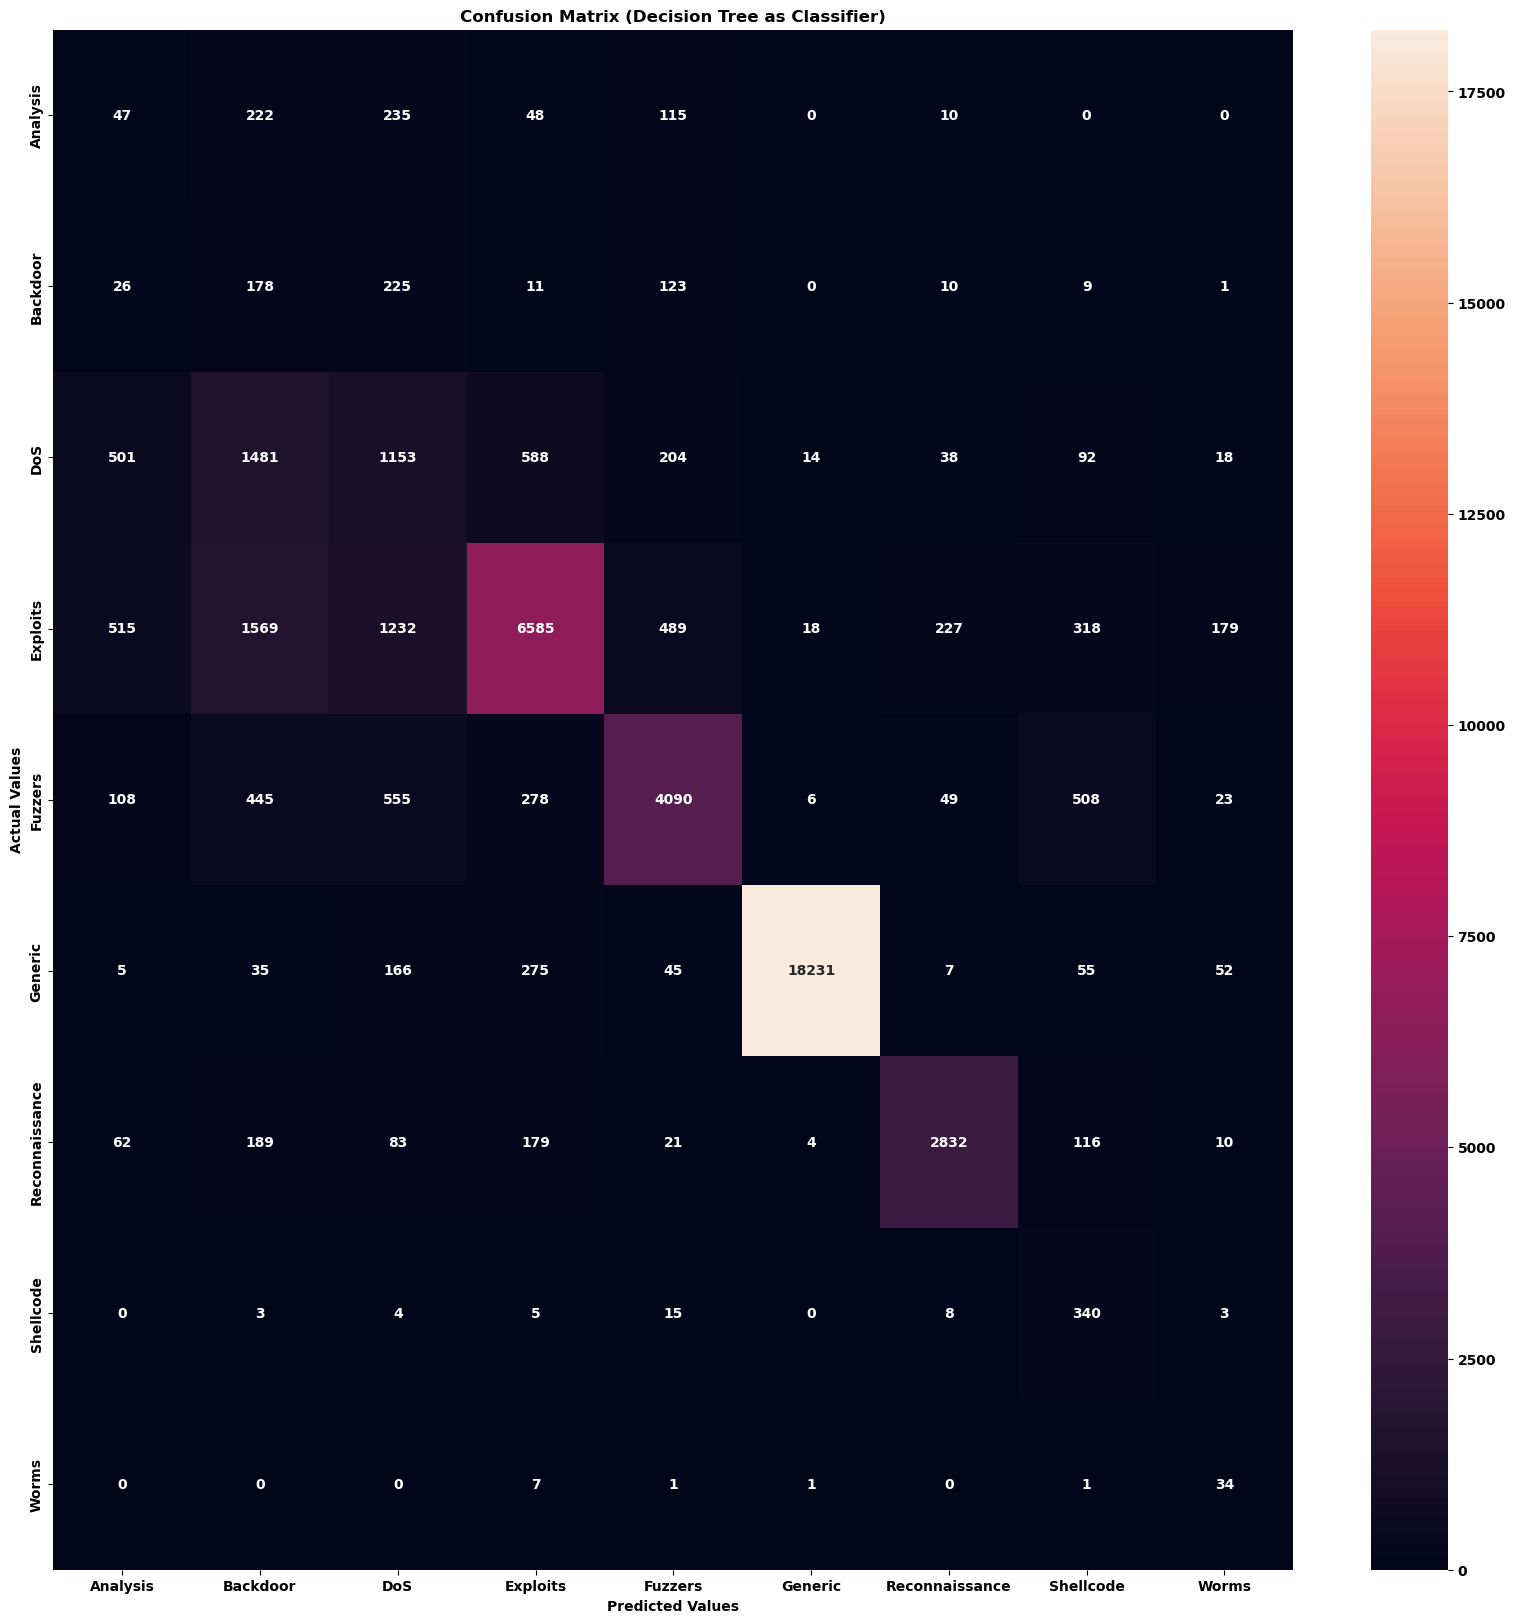

In [45]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Decision Tree as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [46]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.06942392909896603
Backdoor: 0.3053173241852487
DoS: 0.2819760332599658
Exploits: 0.5915379087315846
Fuzzers: 0.674694820191356
Generic: 0.9660855280589264
Reconnaissance: 0.8100686498855835
Shellcode: 0.8994708994708994
Worms: 0.7727272727272727


### Random Forest

In [47]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_ranfor)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

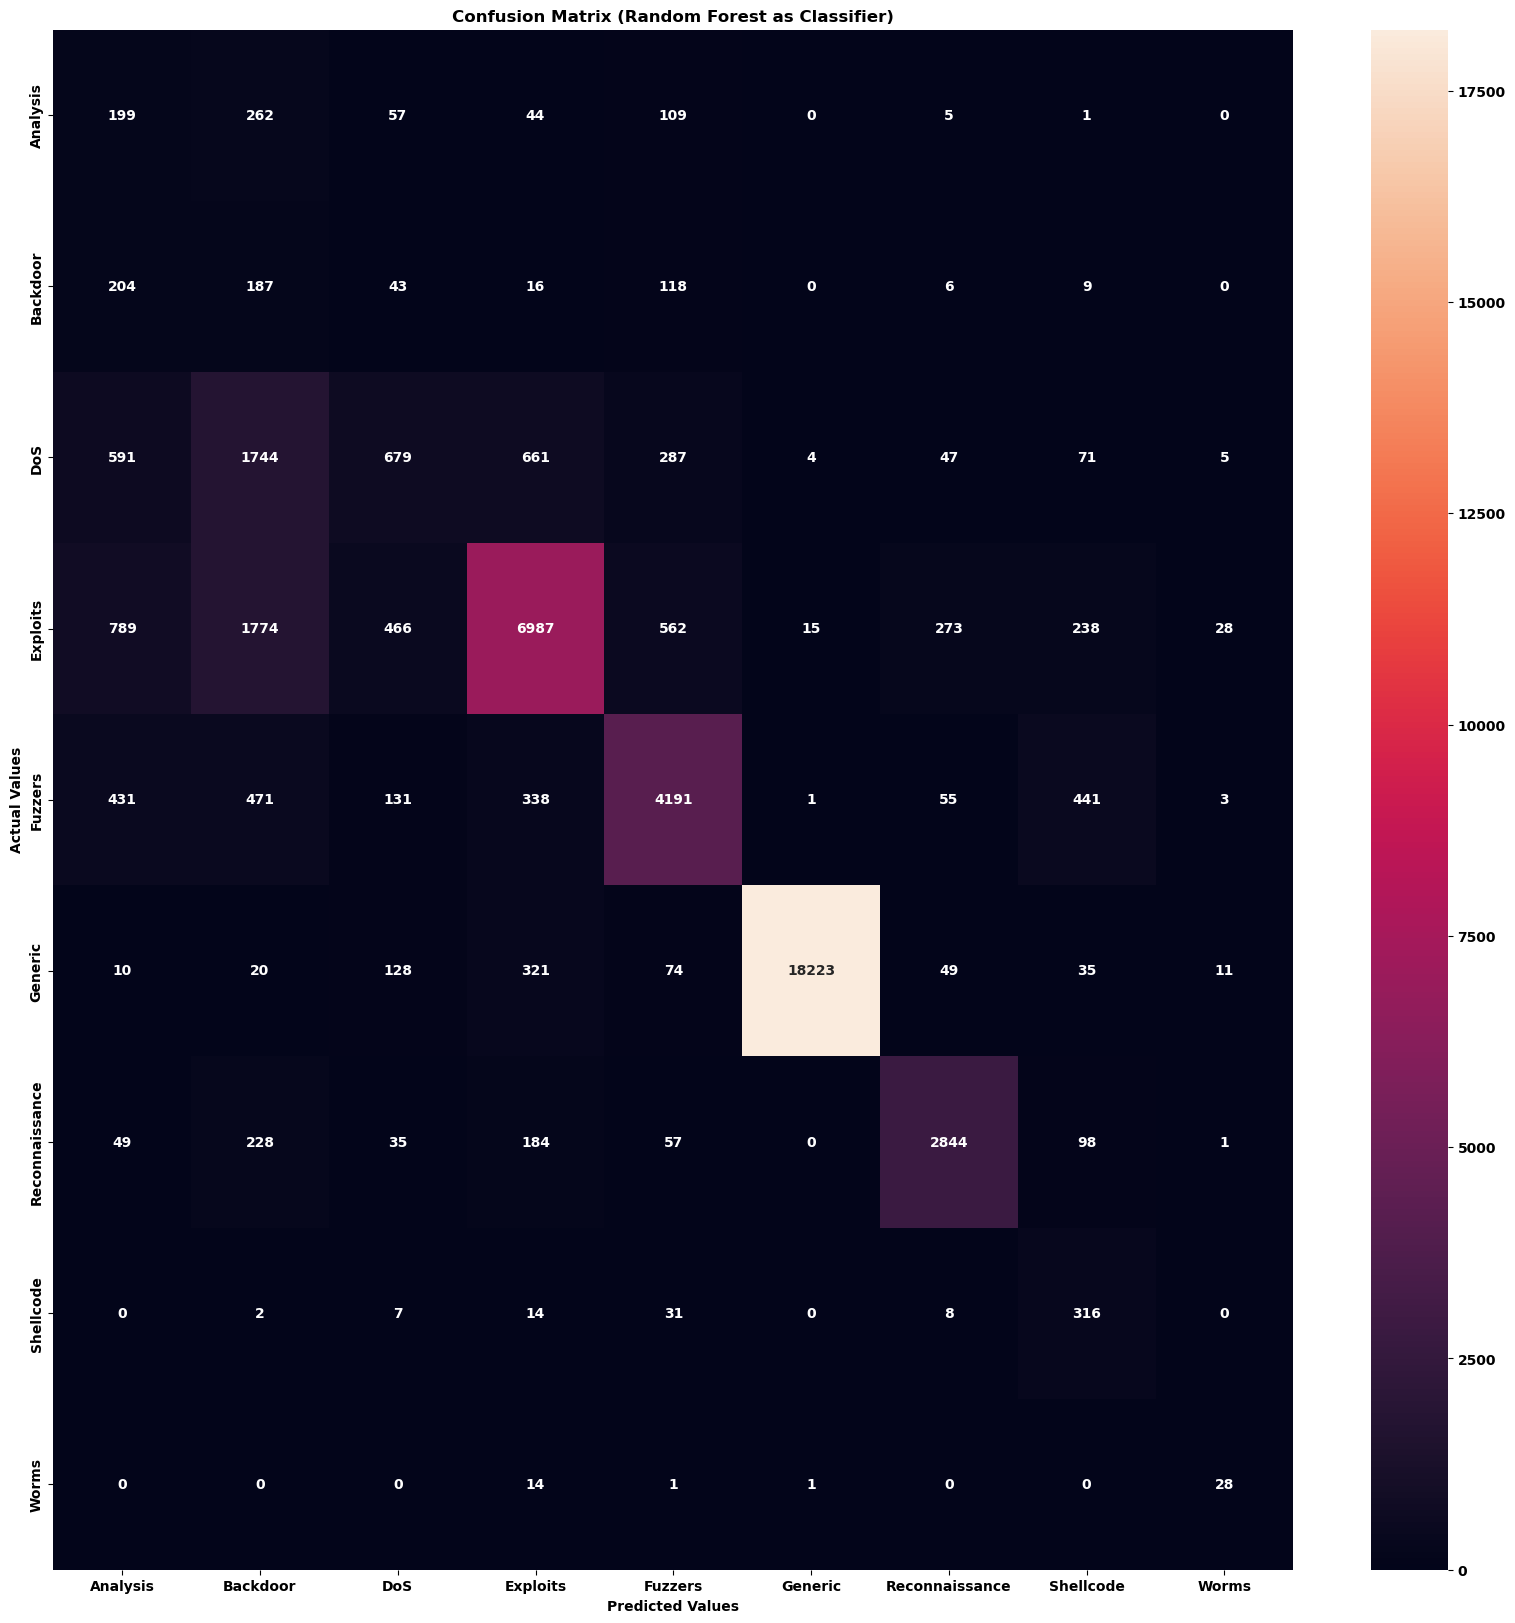

In [48]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Random Forest as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [49]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.29394387001477107
Backdoor: 0.32075471698113206
DoS: 0.1660552702372218
Exploits: 0.6276500179662236
Fuzzers: 0.6913559881227318
Generic: 0.9656615971596629
Reconnaissance: 0.8135011441647597
Shellcode: 0.8359788359788359
Worms: 0.6363636363636364


### Gradient Boosting

In [50]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_gbc)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

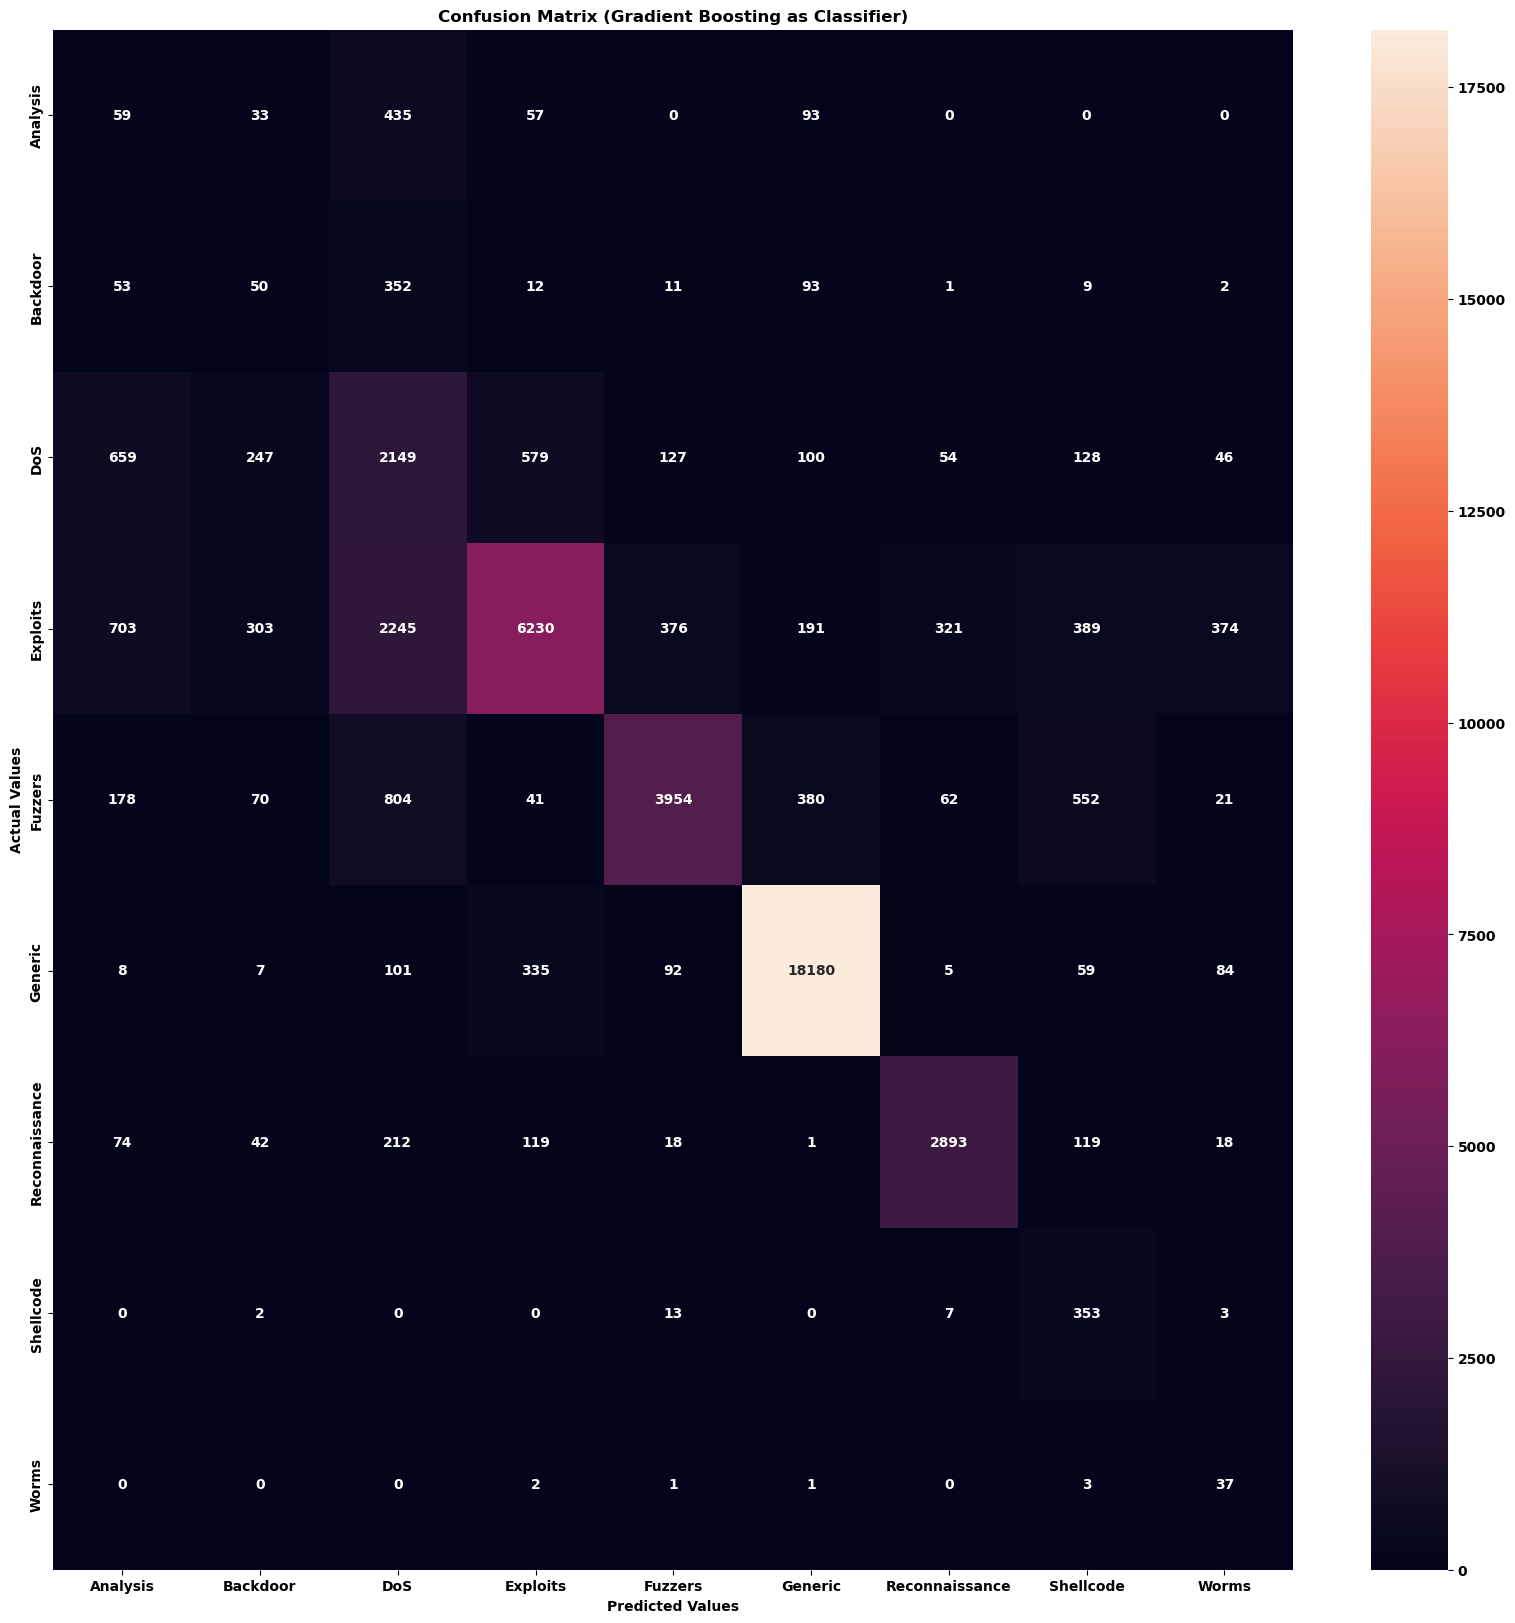

In [51]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Gradient Boosting as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [52]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.08714918759231906
Backdoor: 0.08576329331046312
DoS: 0.5255563707507949
Exploits: 0.5596478620194035
Fuzzers: 0.652259980204553
Generic: 0.963382968576122
Reconnaissance: 0.8275171624713958
Shellcode: 0.9338624338624338
Worms: 0.8409090909090909


### XGBoost

In [53]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_xgb)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

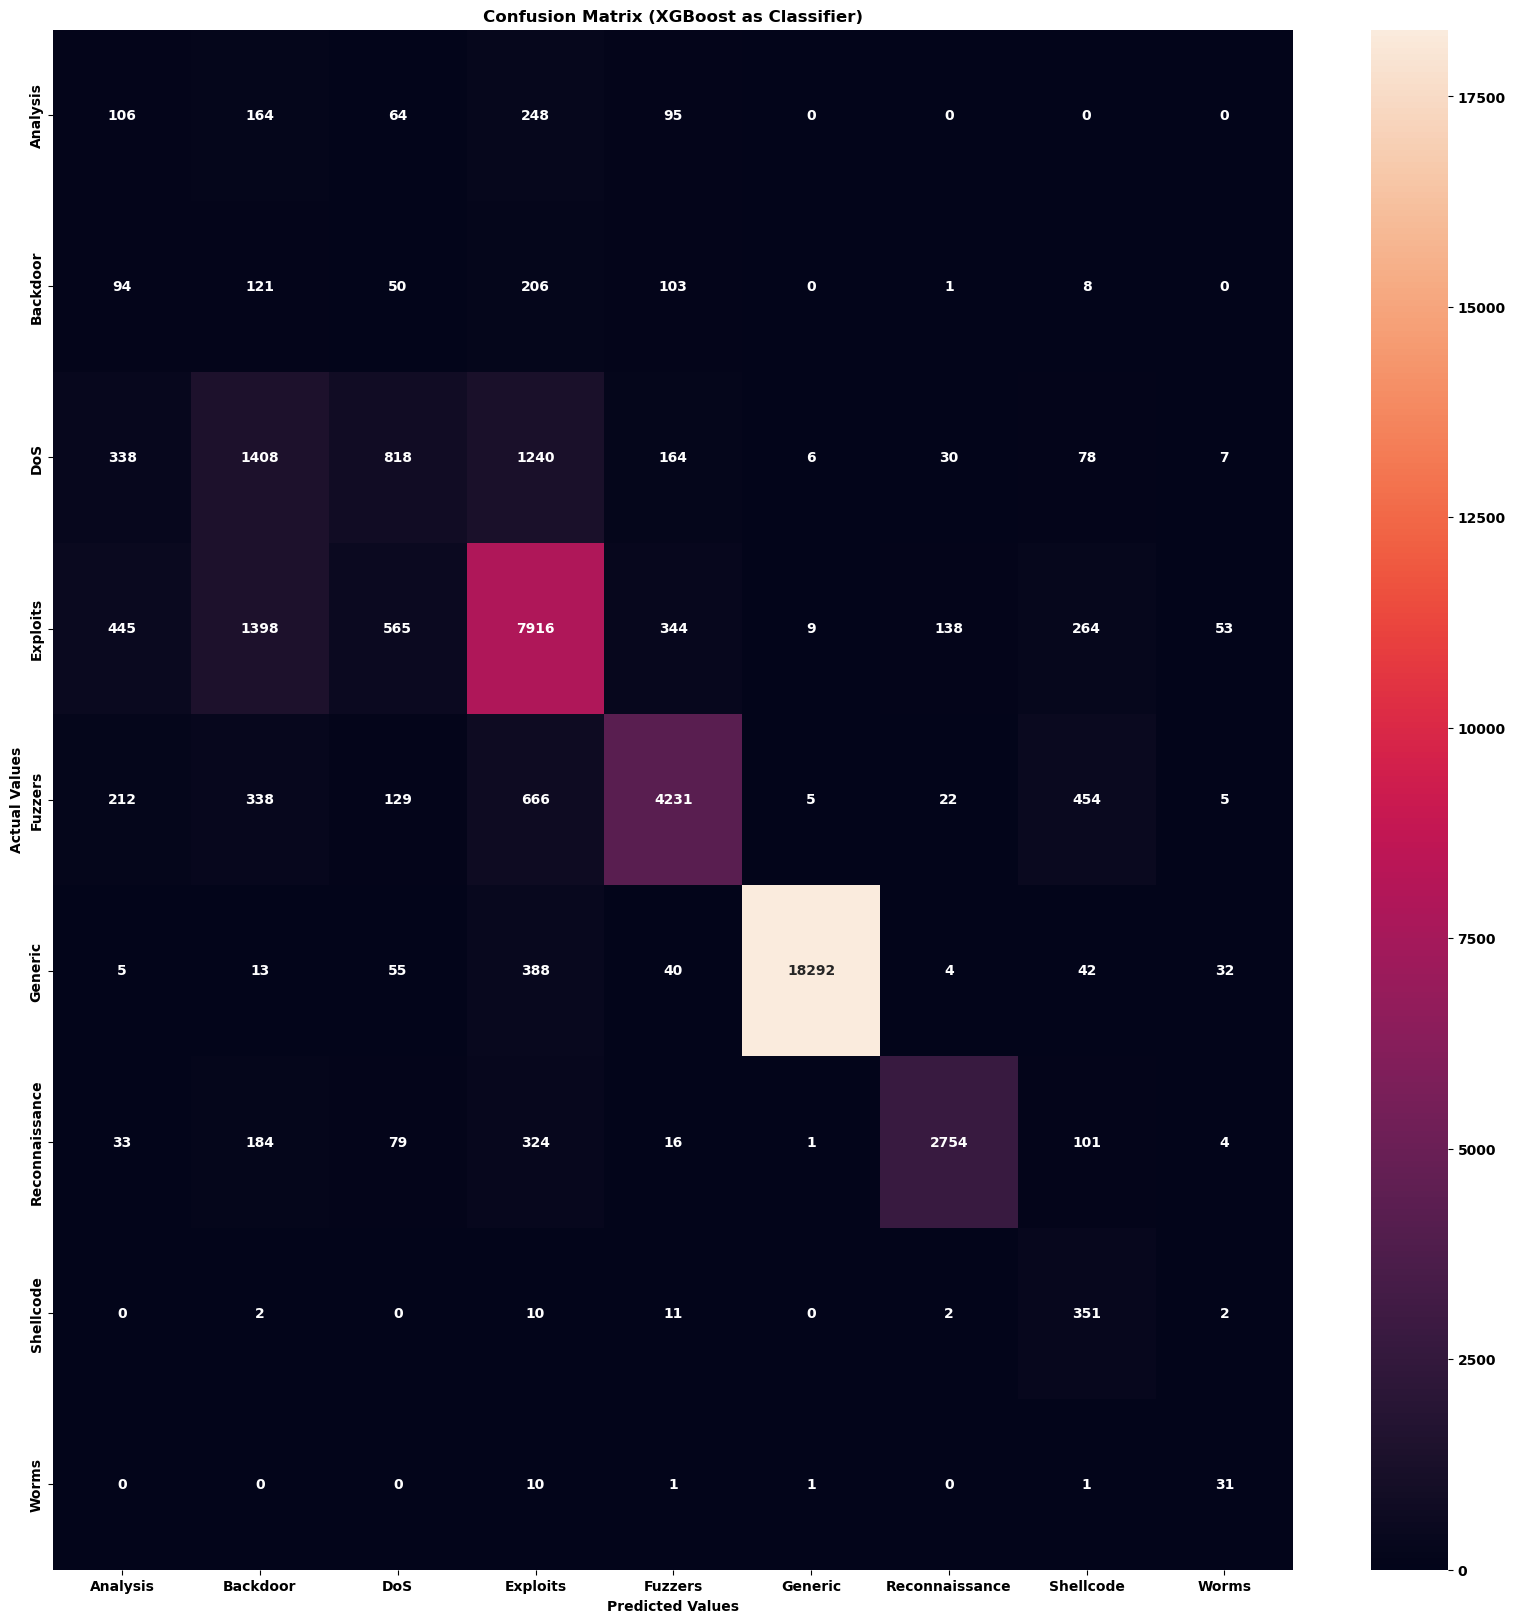

In [54]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (XGBoost as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [55]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.15657311669128507
Backdoor: 0.20754716981132076
DoS: 0.2000489117143556
Exploits: 0.711103126122889
Fuzzers: 0.6979544704717915
Generic: 0.96931800116581
Reconnaissance: 0.7877574370709383
Shellcode: 0.9285714285714286
Worms: 0.7045454545454546


## Save all model

In [56]:
import joblib

In [57]:
# save the decision tree, random forest, gradient boosting, xgboost trained model
joblib.dump(destree, 'D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/destree.joblib', compress=('zlib', 3))
joblib.dump(ranfor, 'D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/ranfor.joblib', compress=('zlib', 3))
joblib.dump(gbc, 'D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/gbc.joblib', compress=('zlib', 3))
joblib.dump(xgb, 'D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/xgb.joblib', compress=('zlib', 3))

['D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/xgb.joblib']

In [58]:
# load the decision tree, random forest, gradient boosting, xgboost trained model
destree = joblib.load('D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/destree.joblib')
ranfor = joblib.load('D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/ranfor.joblib')
gbc = joblib.load('D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/gbc.joblib')
xgb = joblib.load('D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/xgb.joblib')

## Save all predicted

In [59]:
# save the decision tree, random forest, gradient boosting, xgboost trained model
joblib.dump(p_test_destree, 'D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/p_test_destree.joblib', compress=('zlib', 3))
joblib.dump(p_test_ranfor, 'D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/p_test_ranfor.joblib', compress=('zlib', 3))
joblib.dump(p_test_gbc, 'D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/p_test_gbc.joblib', compress=('zlib', 3))
joblib.dump(p_test_xgb, 'D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/p_test_xgb.joblib', compress=('zlib', 3))

['D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/p_test_xgb.joblib']

In [60]:
# load the decision tree, random forest, gradient boosting, xgboost trained model
p_test_destree = joblib.load('D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/p_test_destree.joblib')
p_test_ranfor = joblib.load('D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/p_test_ranfor.joblib')
p_test_gbc = joblib.load('D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/p_test_gbc.joblib')
p_test_xgb = joblib.load('D:/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/SMOTE/Saved/p_test_xgb.joblib')